In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
merge_data = pd.merge(ride_data, city_data, on ="city", how="inner")
# Display the data table for preview
merge_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

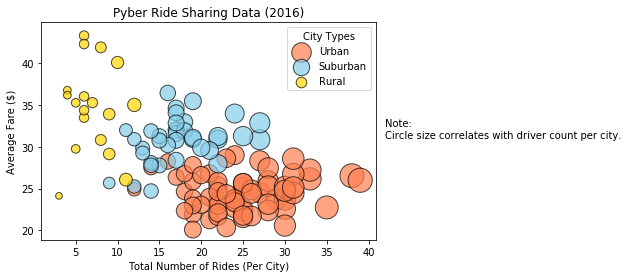

In [21]:
# Obtain the x and y coordinates for each of the three city types
# separate data by city type
urban = merge_data["type"] == "Urban"
rural = merge_data["type"] == "Rural"
suburban = merge_data["type"] == "Suburban"

urban_df = merge_data[urban]
rural_df = merge_data[rural]
sub_df = merge_data[suburban]

#urban
u_avg_fare = urban_df.groupby("city")["fare"].mean()
u_rides_per_city = urban_df.groupby("city")["fare"].count()
u_drivers = urban_df.groupby("city")["driver_count"].count()
u_x_axis = u_rides_per_city
u_y_axis = u_avg_fare
u_size = u_drivers*15

#rural
r_avg_fare = rural_df.groupby("city")["fare"].mean()
r_rides_per_city = rural_df.groupby("city")["fare"].count()
r_drivers = rural_df.groupby("city")["driver_count"].count()
r_x_axis = r_rides_per_city
r_y_axis = r_avg_fare
r_size = r_drivers*15

#suburban
s_avg_fare = sub_df.groupby("city")["fare"].mean()
s_rides_per_city = sub_df.groupby("city")["fare"].count()
s_drivers = sub_df.groupby("city")["driver_count"].count()
s_x_axis = s_rides_per_city
s_y_axis = s_avg_fare
s_size = s_drivers*15

# Build the scatter plots for each city types
fig, ax = plt.subplots()

ax.scatter(u_x_axis,u_y_axis,marker='o',facecolor="coral",edgecolors="black",s=u_size,alpha = 0.7, label="Urban")
ax.scatter(s_x_axis,s_y_axis,marker='o',facecolor="skyblue",edgecolors="black",s=s_size,alpha = 0.7, label="Suburban")
ax.scatter(r_x_axis,r_y_axis,marker='o',facecolor="gold",edgecolors="black",s=r_size,alpha = 0.7, label="Rural")

# Create a legend
ax.legend(title="City Types")

plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")

# Incorporate a text label regarding circle size
ax.text(42,32.5,"Note:")
ax.text(42,31,"Circle size correlates with driver count per city.")

# Save Figure
plt.savefig("Pyber_Ride_Sharing_Data")

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

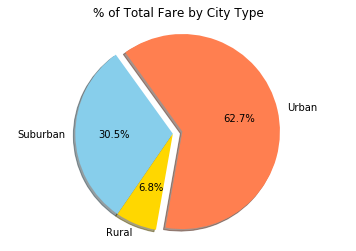

In [22]:
# Calculate Type Percents
urban_fares = urban_df["fare"].sum()
sub_fares = sub_df["fare"].sum()
rural_fares = rural_df["fare"].sum()

fares = [urban_fares,sub_fares,rural_fares]
labels = ["Urban","Suburban","Rural"]

# Build Pie Chart
colors = ["coral", "skyblue", "gold"]
explode = (0.1, 0, 0)
plt.pie(fares, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=260)
plt.axis("equal")
plt.title("% of Total Fare by City Type")

# Save Figure
plt.savefig("Total_fare_by_city_type")

In [5]:
# Show Figure
plt.show()

## Total Rides by City Type

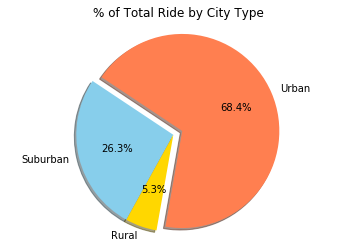

In [23]:
# Calculate Ride Percents
urban_ride = urban_df["fare"].count()
sub_ride = sub_df["fare"].count()
rural_ride = rural_df["fare"].count()

fares = [urban_ride,sub_ride,rural_ride]
labels = ["Urban","Suburban","Rural"]

# Build Pie Chart
colors = ["coral", "skyblue", "gold"]
explode = (0.1, 0, 0)
plt.pie(fares, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=260)
plt.axis("equal")
plt.title("% of Total Ride by City Type")

# Save Figure
plt.savefig("Total_Ride_by_City_Type")

In [7]:
# Show Figure
plt.show()

## Total Drivers by City Type

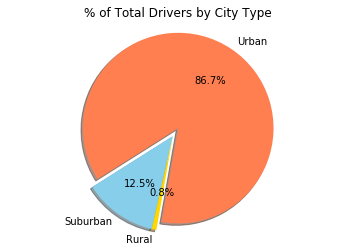

In [24]:
# Calculate Driver Percents
urban_drive = urban_df["driver_count"].sum()
sub_drive = sub_df["driver_count"].sum()
rural_drive = rural_df["driver_count"].sum()

drive = [urban_drive,sub_drive,rural_drive]
labels = ["Urban","Suburban","Rural"]

# Build Pie Charts
colors = ["coral", "skyblue", "gold"]
explode = (0.1, 0, 0)
plt.pie(drive, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=260)
plt.axis("equal")
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("Total_Drivers_by_City_Type")


In [9]:
# Show Figure
plt.show()